## 공공데이터 과제 #3

1. 대구시의 7개 구별 (중구, 동구, 서구, 남구, 북구, 수성구, 달서구) 남녀 비율 및 대구시
전체의 남녀 비율을 각각의 파이 차트로 나타내시오.
- subplots를 이용하여 4x2 형태의 총 8개의 subplot을 파이 차트로 구현
- gender.csv 파일 사용

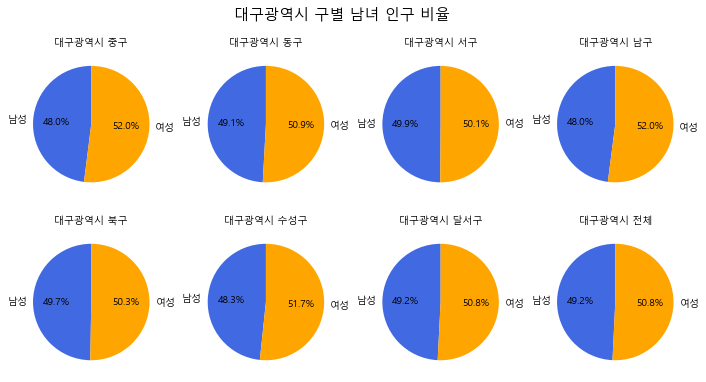

In [246]:
import csv
import matplotlib.pyplot as plt
import platform
import re

def city_name():
    return '대구광역시'

def sum_population():
    f=open('gender.csv',encoding='euc_kr')
    data=csv.reader(f)
    district_list=['','중구','동구','서구','남구','북구','수성구','달서구']
    male_list=[]
    female_list=[]
    for district in district_list:
        for row in data:
            if city_name()+' '+district in row[0]:
                for i in range(104,105):
                    male_list.append(int(row[i].replace(',','')))
                    female_list.append(int(row[i+103].replace(',','')))
                break # 도시 하위 목록이 많음. 처음에 나오는 데이터가 전체 총합
        if platform.system()=='Windows':
            plt.rc('font',family='Malgun Gothic')
        else:
            plt.rc('font',family='AppleGothic')
    draw_show()
    f.close()
    
def draw_show():
    # 전체 subplot의 개수 설정 (2x4=총8개)
    fig, axes=plt.subplots(2,4,figsize=(12, 6),sharex=True,sharey=True)
    # 전체 그래프의 타이틀 설정
    fig.suptitle('대구광역시 구별 남녀 인구 비율', fontsize=15)
    color=['royalblue','orange']
    for i in range(len(district_list)):
        if i==0:
            plt.subplot(2,4,8)
            plt.title(city_name()+' 전체',size=10)
        else: 
            plt.subplot(2,4,i)
            plt.title(city_name()+' '+district_list[i],size=10)
        population=[male_list[i],female_list[i]]
        plt.pie(population,labels=['남성','여성'],autopct='%.1f%%',
               colors=color,startangle=90)
    plt.show()
    
sum_population()